In [21]:
import pyttsx3  # For text-to-speech functionality
import pandas as pd  # For data manipulation and analysis
from sklearn.ensemble import RandomForestRegressor  # For machine learning model
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

In [6]:
# Load the dataset
data = {
    'Runs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Voltage': [1.5, 1.6, 1.7, 1.8, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4],
    'Current': [0.09, 0.33, 0.73, 1.6, 1.73, 2.43, 2.6, 3.75, 4.29, 4.5, 5.76],
    'Hydrogen Production Rate': [0.65, 2.5, 5.5, 12, 15, 20, 25, 30, 35, 55, 60]
}

In [23]:
# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Calculate power consumed and add it as a new column in the DataFrame
df['Power Consumed'] = df['Voltage'] * df['Current']



In [8]:
# Split the data into features and target variables
X = df[['Voltage', 'Current']]
y = df['Hydrogen Production Rate']


In [24]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X, y)

# Generate all combinations of voltage and current from the dataset
existing_combinations = df[['Voltage', 'Current']]

# Predict hydrogen production rates for all combinations
predictions = rf_regressor.predict(existing_combinations)

In [11]:
# Print all combinations, power consumed, and predicted hydrogen production rates
print("Existing combinations, power consumed, and predicted hydrogen production rates:")
for i, row in existing_combinations.iterrows():
    power_consumed = row['Voltage'] * row['Current']
    print(f"Voltage: {row['Voltage']}, Current: {row['Current']}, Power Consumed: {power_consumed:.2f} -> Predicted Hydrogen Production Rate: {predictions[i]}")


Existing combinations, power consumed, and predicted hydrogen production rates:
Voltage: 1.5, Current: 0.09, Power Consumed: 0.14 -> Predicted Hydrogen Production Rate: 2.147500000000002
Voltage: 1.6, Current: 0.33, Power Consumed: 0.53 -> Predicted Hydrogen Production Rate: 2.684000000000001
Voltage: 1.7, Current: 0.73, Power Consumed: 1.24 -> Predicted Hydrogen Production Rate: 6.524500000000001
Voltage: 1.8, Current: 1.6, Power Consumed: 2.88 -> Predicted Hydrogen Production Rate: 12.775
Voltage: 1.8, Current: 1.73, Power Consumed: 3.11 -> Predicted Hydrogen Production Rate: 14.08
Voltage: 1.9, Current: 2.43, Power Consumed: 4.62 -> Predicted Hydrogen Production Rate: 19.485
Voltage: 2.0, Current: 2.6, Power Consumed: 5.20 -> Predicted Hydrogen Production Rate: 24.37
Voltage: 2.1, Current: 3.75, Power Consumed: 7.88 -> Predicted Hydrogen Production Rate: 29.7
Voltage: 2.2, Current: 4.29, Power Consumed: 9.44 -> Predicted Hydrogen Production Rate: 38.55
Voltage: 2.3, Current: 4.5, Po

In [12]:
# Find the index of the highest predicted hydrogen production rate
best_index = np.argmax(predictions)
best_combination = existing_combinations.iloc[best_index]
best_prediction = predictions[best_index]

In [13]:
# Print the best combination, power consumed, and its predicted hydrogen production rate
best_power_consumed = best_combination['Voltage'] * best_combination['Current']
print("\nBest predicted result:")
print(f"Best Combination - Voltage: {best_combination['Voltage']}, Current: {best_combination['Current']}, Power Consumed: {best_power_consumed:.2f}")
print(f"Predicted Hydrogen Production Rate: {best_prediction}")



Best predicted result:
Best Combination - Voltage: 2.4, Current: 5.76, Power Consumed: 13.82
Predicted Hydrogen Production Rate: 55.85


In [25]:

# Use text-to-speech to announce the best combination
engine = pyttsx3.init()
engine.say(f"The best combination is Voltage: {best_combination['Voltage']}V, Current: {best_combination['Current']}A, Power Consumed: {best_combination['Voltage']*best_combination['Current']:.2f}, Predicted Hydrogen Production Rate: {best_prediction}")
engine.runAndWait()


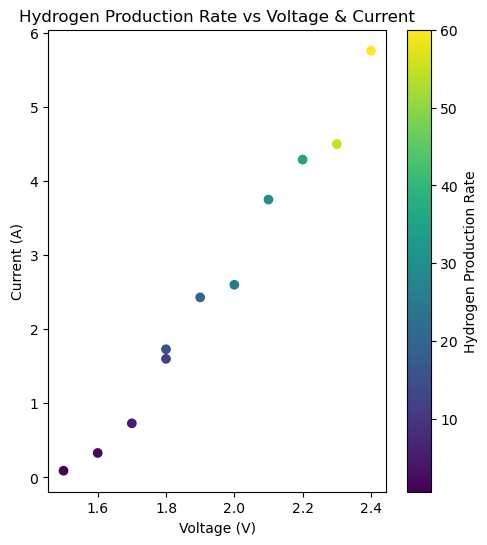

In [20]:
# Plotting the data
fig = plt.figure(figsize=(12, 6))

# Plot 2D graph
plt.subplot(1, 2, 1)
plt.scatter(df['Voltage'], df['Current'], c=df['Hydrogen Production Rate'], cmap='viridis')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Hydrogen Production Rate vs Voltage & Current')
plt.colorbar(label='Hydrogen Production Rate')
